In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
from scipy.stats import levene # Optional assumption for standard t-test
from scipy.stats import ttest_ind  # To perform t-test

df = pd.read_csv("Apple_Store_Reviews.csv")
df

,Review_ID,App_Name,User_Age,Review_Date,Rating,Review_Text,Likes,Device_Type,Version_Used,Country,Purchase_Amount,Category
0,1,Candy Crush Saga,21,2023-01-16,4,"Great game, but too many in-game purchases.",70,iPhone 12,3.231.19,Australia,0.00,Games
1,2,Spotify,57,2024-02-01,1,"Good, but has connection issues sometimes.",49,iPhone SE,4.102.9,Germany,7.15,Music
2,3,TikTok,33,2023-11-30,5,Awesome app! Best entertainment content.,98,iPhone 12,7.52.0,Germany,4.98,Entertainment
3,4,Audible,40,2023-04-03,5,"Great app, but it's a bit pricey.",74,iPhone 13,5.260.15,Australia,0.00,Books
4,5,Spotify,44,2023-05-01,1,"Good, but has connection issues sometimes.",47,iPhone SE,4.50.18,Australia,14.31,Music
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Headspace,30,2023-11-15,3,"Good, but the premium content is expensive.",65,iPhone SE,6.284.11,US,0.00,Health
996,997,Duolingo,19,2024-09-27,1,Disappointing. Hard to follow and buggy.,4,iPhone SE,6.293.8,Canada,7.25,Education
997,998,Duolingo,38,2023-06-07,5,Excellent for learning new skills!,85,iPhone 11,10.277.15,Mexico,13.33,Education
998,999,Instagram,52,2024-03-04,4,"Great app, but sometimes it lags.",55,iPhone 13,3.52.20,US,6.37,Social


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Review_ID        1000 non-null   int64  
 1   App_Name         1000 non-null   object 
 2   User_Age         1000 non-null   int64  
 3   Review_Date      1000 non-null   object 
 4   Rating           1000 non-null   int64  
 5   Review_Text      1000 non-null   object 
 6   Likes            1000 non-null   int64  
 7   Device_Type      1000 non-null   object 
 8   Version_Used     1000 non-null   object 
 9   Country          1000 non-null   object 
 10  Purchase_Amount  1000 non-null   float64
 11  Category         1000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


In [3]:
df.isnull().sum()

Review_ID          0
App_Name           0
User_Age           0
Review_Date        0
Rating             0
Review_Text        0
Likes              0
Device_Type        0
Version_Used       0
Country            0
Purchase_Amount    0
Category           0
dtype: int64

In [21]:
df["Review_Date"] = pd.to_datetime(df["Review_Date"])

df["Rating"].describe()

count    1000.000000
mean        2.869000
std         1.467649
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Rating, dtype: float64

In [26]:
mean = df["Rating"].mean()
print(mean)
# Median - Robust to outliers and skewed distributions; provides a better central tendency for non-symmetrical data.

median = df["Rating"].median()
print(median)

# Mode: Useful when the data has a prominent peak or category that repeats frequently.

mode = df["Rating"].mode()
print(mode)

2.869
3.0
0    1
Name: Rating, dtype: int64


In [6]:
# Median - Robust to outliers and skewed distributions; provides a better central tendency for non-symmetrical data.

median = df["Rating"].median()
median

3.0

In [7]:
# Mode: Useful when the data has a prominent peak or category that repeats frequently.

mode = mode(df["Rating"])
mode

1

In [8]:
df["Rating"].mode()

0    1
Name: Rating, dtype: int64

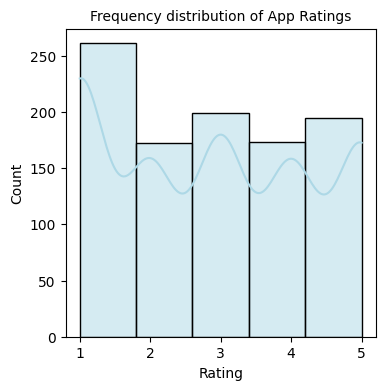

In [27]:
plt.figure(figsize = (4,4))
sns.histplot(data = df["Rating"], bins = 5, color = "lightblue", edgecolor = "black", kde = True)
plt.title("Frequency distribution of App Ratings", fontsize = 10)
plt.show()

Maximum Purchase Amount : 19.97
Minimum Purchase Amount :  0.0
Q1 (25th percentile):  0.0
Q3 (75th percentile): 10.192499999999999
Range (Max - Min): 19.97
Interquartile Range (IQR = Q3 - Q1): 10.192499999999999


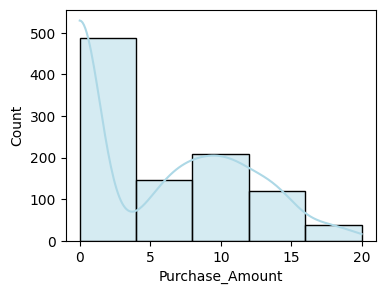

In [30]:
# Range = (min_value, max_value)
# IQR = Q3 - Q1(0.75 - 0.25)
'''
Conclusion : 
The Range highlights the extreme values in the data, while the IQR gives a more focused view of typical purchase behaviors. 
Based on this, the dataset shows significant variability in purchase amounts, with a notable cluster at lower values. 

Insights:
- The data has a large spread, with some high-value purchases pushing the maximum to $19.97. However, the low 
Q1 shows a cluster of free or minimal-value purchases.
- The relatively high IQR ($10.19) compared to the Range ($19.97) indicates that the variability in the middle 50% of data is significant.
This implies diverse spending behaviors among users.
'''


minimum = df["Purchase_Amount"].min()
maximum = df["Purchase_Amount"].max()

q1 = df["Purchase_Amount"].quantile(0.25)
q3 = df["Purchase_Amount"].quantile(0.75)

Range = maximum - minimum
IQR = q3 -q1

print("Maximum Purchase Amount :",maximum)
print("Minimum Purchase Amount : ",minimum)
print("Q1 (25th percentile): ",q1)
print("Q3 (75th percentile):",q3)
print("Range (Max - Min):", Range)
print("Interquartile Range (IQR = Q3 - Q1):", IQR)

plt.figure(figsize = (4,3))
sns.histplot(data = df["Purchase_Amount"], kde = True, bins = 5, color = "lightblue",edgecolor = "black")
plt.show()

Standard deviation :  28.685443672334557
Variance :  822.8546786786787


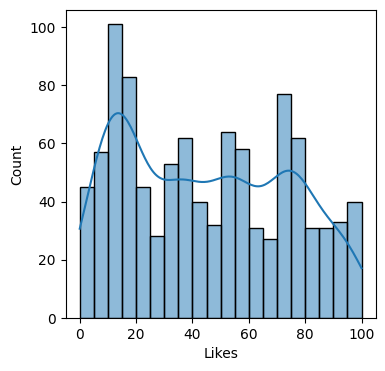

In [32]:
'''
Standard Deviation (28.69):
The standard deviation indicates a moderate level of variability in the number of likes.
Most reviews tend to receive likes that are within a range of approximately 28.69 likes above or below the mean.
This suggests that while some reviews perform better or worse than average, the majority of reviews have a fairly consistent level of engagement.

Variance (822.85):
The variance, being the square of the standard deviation, quantifies the spread of the data but in squared units.
The relatively high value confirms the presence of variability, though it is less intuitive to interpret compared to the standard deviation.

Conclusion : 
The combination of moderate standard deviation and variance highlights that while there are variations in the number of likes received,
most reviews tend to perform within a predictable range around the average.
'''



std = df["Likes"].std()
print("Standard deviation : ",std)
var = df["Likes"].var()
print("Variance : ",var)

plt.figure(figsize  = (4,4))
sns.histplot(data= df["Likes"], kde = True, bins = 20)
plt.show()

Correlation :             Likes    Rating
Likes   1.000000  0.842541
Rating  0.842541  1.000000


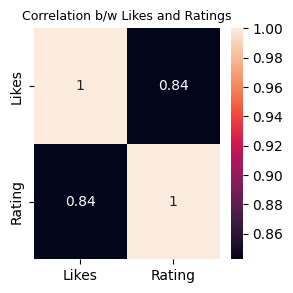

In [37]:
'''
Interpretation of the Correlation:
Value of Correlation (0.8425):

Correlation values range from -1 to 1:
+1: Perfect positive correlation.
0: No correlation.
-1: Perfect negative correlation.
A correlation of 0.8425 is close to +1, suggesting a strong positive relationship.
What It Means:

As the rating of a review increases, the number of likes it receives also tends to increase.
High ratings are strongly associated with high engagement (likes), 
indicating that users are more likely to like reviews they perceive as positive or useful.
'''

corr = df[["Likes","Rating"]].corr()
print("Correlation : ", corr)


plt.figure(figsize = (3,3))
sns.heatmap(data = corr, annot = True)
plt.title("Correlation b/w Likes and Ratings", fontsize = 9)
plt.show()

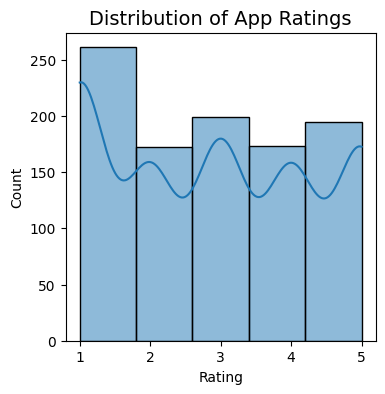

Skewness :  0.10182054838079216


In [38]:
'''
A skewness value close to 0 indicates that the distribution is approximately symmetrical.

Skewness Value: The skewness of the app ratings is 0.1018
0.1018, which is close to zero. This indicates an approximately symmetrical distribution with a slight positive skew.

The histogram confirms this, as most ratings are clustered near the mean with a small rightward tail.

Conclusion: The nearly symmetrical distribution suggests balanced user satisfaction.
This indicates that the app performs moderately well in meeting user expectations.

'''



plt.figure(figsize=(4,4))
sns.histplot(data = df["Rating"], bins = 5, kde = True, edgecolor = "black")
plt.title("Distribution of App Ratings", fontsize=14)
plt.show()
skew = df["Rating"].skew()
print("Skewness : ",skew)

In [15]:
#Hypothesis testing 

instagram_ratings = df[df["App_Name"] == "Instagram"]["Rating"]
whatsapp_ratings = df[df["App_Name"] == "WhatsApp"]["Rating"]
instagram_ratings.describe()


count    115.000000
mean       2.773913
std        1.475299
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [16]:
whatsapp_ratings.describe()

count    104.000000
mean       2.932692
std        1.469855
min        1.000000
25%        1.750000
50%        3.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

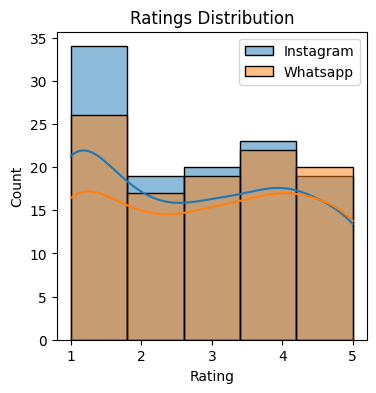

In [39]:
# plot for ratings distribution

plt.figure(figsize = (4,4))
sns.histplot(data = instagram_ratings, bins= 5, kde= True, label = "Instagram")
sns.histplot(data = whatsapp_ratings, bins= 5, kde= True, label = "Whatsapp")
plt.title("Ratings Distribution")
plt.legend()
plt.show()



In [18]:
stat, p = levene(instagram_ratings, whatsapp_ratings)
print("Levene's Test P-Value:", p)
print("--------------------------")
t_stat, p_value = ttest_ind(instagram_ratings, whatsapp_ratings, alternative='greater')

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

Levene's Test P-Value: 0.7874164357527333
--------------------------
T-Statistic: -0.79674231444911
P-Value: 0.786764229580496


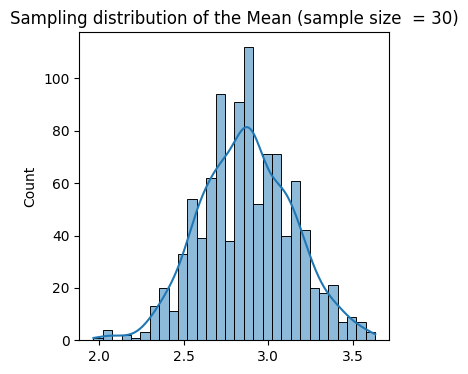

Population Mean: 2.869
Sampling Mean: 2.8728000000000002
Standard Error: 0.2718294890388295


In [40]:
#Performing CLT

#Parameters
sample_size = 30
num_samples = 1000

# Population data = Ratings column
population = df["Rating"]

# Step -1 ; Taking randome samples and calculating their means
sample_means = []
for i in range (num_samples):
    sample = np.random.choice(population,size = sample_size, replace = True)
    sample_means.append(np.mean(sample))

#step -2 ; Creating sampling distribution 
plt.figure(figsize = (4,4))
sns.histplot(data = sample_means,bins = 30, edgecolor = "black", kde = True)
plt.title("Sampling distribution of the Mean (sample size  = 30)", fontsize = 12)
plt.show()

#Step - 3 ; Comparing Population mean with Sampling mean
population_mean = np.mean(population)
sampling_mean = np.mean(sample_means)
sampling_std = np.std(sample_means)

print("Population Mean:", population_mean)
print("Sampling Mean:", sampling_mean)
print("Standard Error:", sampling_std)
